# xeno-spectral
This tutorial gives some advice on the [xeno-spectral dataset](https://spectralverse-heidelberg.org/xeno_spectral). This dataset contains every animal image which we use in our xeno-learning publication (excluding supplementary figures). The structure of the dataset is similar to our other datasets so the way to access the data is also the same. Hence, make sure to check out the other tutorials as well, especially the [general introduction](./General.ipynb) on how to work with the data.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rich import print

from htc import Config, DataPath, DatasetImage, LabelMapping, map_label_image, median_table, settings
from htc_projects.species.settings_species import settings_species

## Dataset Overview
The xeno-spectral dataset is huge, even exceeding the size of the [HeiPorSPECTRAL dataset](https://heiporspectral.org). It contains two species (pig and rat), three perfusion states (malperfusion, ICG and physiological) and different annotations (mainly polygon and semantic annotations). Depending on what you want to do, you may not be interested in the whole dataset. But first we need to know what is in the dataset. So let's start with a comprehensive table with all images (one row denotes one label (`label_name`) per image (`image_name`) annotated by one annotation type (`annotation_name`)):

In [2]:
df = pd.concat([median_table("xeno_spectral_pig"), median_table("xeno_spectral_rat")])
df

,image_name,subject_name,timestamp,label_index,label_name,median_spectrum,std_spectrum,median_normalized_spectrum,std_normalized_spectrum,n_pixels,...,Fremdlichterkennung_Breite LED Rot,Fremdlichterkennung_Breite LED Gruen,Fremdlichterkennung_Grenzwert Pixelanzahl,Fremdlichterkennung_Intensity Grenzwert,Aufnahme_Aufnahmemodus,path,annotation_name,Temperaturen_HSI-Sensor Temp. vor Scan,Temperaturen_HSI-Sensor Temp. nach Scan,sensor_temperature
0,P005#2018_09_18_20_09_05,P005,2018_09_18_20_09_05,28,stomach,"[0.2595342, 0.22758853, 0.2139268, 0.19648558,...","[0.113119945, 0.08357403, 0.06502132, 0.051134...","[0.0063944357, 0.0055998666, 0.0052299444, 0.0...","[0.002597581, 0.0018951672, 0.0014162053, 0.00...",1360,...,<NA>,<NA>,<NA>,<NA>,<NA>,subjects/P005/2018_09_18_20_09_05,polygon#annotator1,<NA>,<NA>,<NA>
1,P005#2018_09_18_20_14_04,P005,2018_09_18_20_14_04,28,stomach,"[0.17900941, 0.16376984, 0.15076503, 0.140343,...","[0.06852855, 0.053112328, 0.042058278, 0.03295...","[0.0047492464, 0.0043022493, 0.003965777, 0.00...","[0.0017409956, 0.0013386236, 0.0010396482, 0.0...",1025,...,<NA>,<NA>,<NA>,<NA>,<NA>,subjects/P005/2018_09_18_20_14_04,polygon#annotator1,<NA>,<NA>,<NA>
2,P005#2018_09_18_20_19_56,P005,2018_09_18_20_19_56,28,stomach,"[0.15738787, 0.1395674, 0.13776487, 0.13225129...","[0.061539106, 0.048025772, 0.03858572, 0.03092...","[0.0042235344, 0.0037600189, 0.0037129263, 0.0...","[0.0016033561, 0.001235425, 0.0009731681, 0.00...",1007,...,<NA>,<NA>,<NA>,<NA>,<NA>,subjects/P005/2018_09_18_20_19_56,polygon#annotator1,<NA>,<NA>,<NA>
3,P005#2018_09_18_20_24_17,P005,2018_09_18_20_24_17,28,stomach,"[0.15091094, 0.13667127, 0.13540868, 0.1294750...","[0.06483247, 0.048087303, 0.039174784, 0.03064...","[0.0041779587, 0.003780594, 0.0037096406, 0.00...","[0.0017138638, 0.0012513726, 0.0010072428, 0.0...",1032,...,<NA>,<NA>,<NA>,<NA>,<NA>,subjects/P005/2018_09_18_20_24_17,polygon#annotator1,<NA>,<NA>,<NA>
4,P005#2018_09_18_20_29_07,P005,2018_09_18_20_29_07,28,stomach,"[0.1507286, 0.13894017, 0.13846192, 0.13193193...","[0.06349617, 0.04995939, 0.03917325, 0.0313662...","[0.004113053, 0.0037890626, 0.0037009604, 0.00...","[0.0016635271, 0.0012810034, 0.0009954987, 0.0...",1347,...,<NA>,<NA>,<NA>,<NA>,<NA>,subjects/P005/2018_09_18_20_29_07,polygon#annotator1,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24795,R024#2023_10_31_16_00_53#0202-00118,R024,2023_10_31_16_00_53,36,tube,"[0.17267397, 0.15948352, 0.1444994, 0.12830439...","[0.042214803, 0.039302006, 0.037437152, 0.0353...","[0.0043524057, 0.00404103, 0.0036476466, 0.003...","[0.00097394834, 0.0008507611, 0.0007707834, 0....",6354,...,50,50,100,7,Reflektanz,subjects/R024/2023_10_31_16_00_53,semantic#primary,<NA>,<NA>,<NA>
24796,R024#2023_10_31_16_08_46#0202-00118,R024,2023_10_31_16_08_46,36,tube,"[0.15659367, 0.1446061, 0.13084662, 0.11592251...","[0.06033473, 0.06083447, 0.060470723, 0.060590...","[0.004274184, 0.003969716, 0.0035957461, 0.003...","[0.001131887, 0.0010880199, 0.0010720709, 0.00...",6486,...,50,50,100,7,Reflektanz,subjects/R024/2023_10_31_16_08_46,semantic#primary,<NA>,<NA>,<NA>
24797,R024#2023_10_31_16_58_46#0202-00118,R024,2023_10_31_16_58_46,36,tube,"[0.14524455, 0.14191034, 0.13473305, 0.1242537...","[0.05234972, 0.05234892, 0.052366193, 0.052319...","[0.004097944, 0.004007044, 0.0038022003, 0.003...","[0.0010858706, 0.0010332821, 0.0010110068, 0.0...",6910,...,50,50,100,7,Reflektanz,subjects/R024/2023_10_31_16_58_46,semantic#primary,<NA>,<NA>,<NA>
24798,R024#2023_10_31_17_07_14#0202-00118,R024,2023_10_31_17_07_14,36,tube,"[0.106780075, 0.10146604, 0.09310394, 0.082618...","[0.05932709, 0.058875047, 0.059090126, 0.05925...","[0.0033596994, 0.0032268765, 0.0029841256, 0.0...","[0.0012576662, 0.0011888263, 0.0011653248, 0.0...",8667,...,50,50,100,7,Reflektanz,subjects/R024/2023_10_31_17_07_14,semantic#primary,<NA>,<NA>,<NA>


The two main interesting annotations are `semantic#primary` and `semantic#reannotation`. Those are fully annotated images which we also used in previous publications (`semantic#reannotation` is used for the physiological pig images with minor corrections compared to the original `semantic#primary` annotations which are not included in the dataset). If you want to visualize the annotations for an image, you can use the available interactive visualizations (it is possible to filter for semantic annotations only).

In [3]:
df.groupby(["species_name", "annotation_name"], as_index=False)["image_name"].nunique()

,species_name,annotation_name,image_name
0,pig,polygon#annotator1,693
1,pig,semantic#primary,663
2,pig,semantic#reannotation,506
3,rat,polygon#annotator1,2736
4,rat,semantic#primary,597
5,rat,semantic_tags#primary,17


(`semantic_tags#primary` contains sporadic additional information on an additional layer, probably best to ignore.)

There is a lot of metadata available for each image by default. `perfusion_state` corresponds to the categorization which we use in our xeno-learning publication and may be interesting. An image is classified as `icg` if there was prior ICG injection to the animal and it is classified as `malperfused` if the animal was subject to organ or aorta clamping (the `clamping_location` column shows the distinction).

In [4]:
df.groupby(["species_name", "perfusion_state"], as_index=False)["image_name"].nunique()

,species_name,perfusion_state,image_name
0,pig,icg,564
1,pig,malperfused,446
2,pig,physiological,755
3,rat,icg,1137
4,rat,malperfused,1538
5,rat,physiological,658


## Semantic Images
If you want to work with all semantic images, you can use the data path class. Please note the use of the `annotation_name` argument to select both available semantic types.

In [5]:
paths = list(
    DataPath.iterate(settings.data_dirs["xeno_spectral_pig"], annotation_name="semantic#primary&semantic#reannotation")
)
len(paths)

1169

The semantic annotations contain all labels which were used during initial annotation of the image. This does not directly correspond to the labels which we use in our xeno-learning publication, because we only used a subset of labels which are available for all species. Per default, you get the original labels:

2 = background
3 = bladder
5 = colon
7 = fat_subcutaneous
26 = small_bowel
30 = unsure

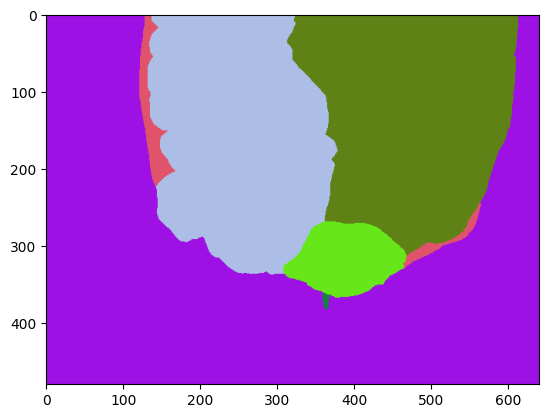

In [6]:
labels = paths[0].read_segmentation()["semantic#reannotation"]
mapping = LabelMapping.from_path(paths[0])  # Original label definition
print("\n".join([f"[{mapping.index_to_color(l)}]{l} = {mapping.index_to_name(l)}" for l in np.unique(labels)]))
plt.imshow(map_label_image(labels, mapping));

If you want to use the same data as in our xeno-learning publication, it is most convenient to use the [`DatasetImage`](../htc/models/image/DatasetImage.py) class and specify the same label mapping as in the publication. The resulting labels are automatically remeapped.

0 = background
2 = small_bowel
3 = colon
12 = unknown

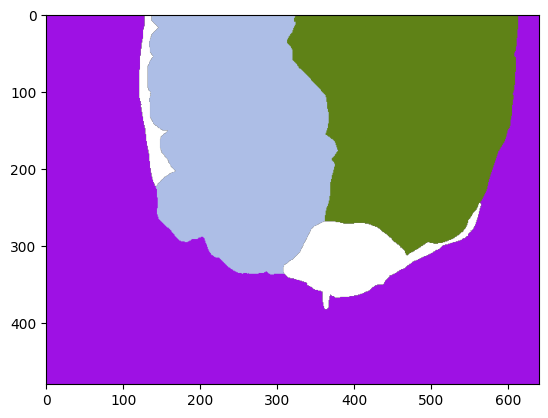

In [7]:
sample = DatasetImage(
    paths=[paths[0]], train=False, config=Config({"label_mapping": settings_species.label_mapping, "no_features": True})
)[0]
labels = sample["labels_semantic#reannotation"]
mapping = settings_species.label_mapping  # Label definition from the paper
print("\n".join([f"[{mapping.index_to_color(l)}]{l} = {mapping.index_to_name(l)}" for l in np.unique(labels)]))
plt.imshow(map_label_image(labels, mapping));

In case you are only interested in images with a specific meta attribute, you can use path filtering:

In [8]:
# All ICG images
icg_filter = lambda p: p.meta("perfusion_state") == "icg"
paths_icg = list(DataPath.iterate(settings.data_dirs["xeno_spectral_pig"], filters=[icg_filter]))
paths_icg += list(DataPath.iterate(settings.data_dirs["xeno_spectral_rat"], filters=[icg_filter]))
len(paths_icg)

1701